# __Análise Discriminante Gaussiana__

In [1]:
import pandas as pd #importando as bibliotecas necessárias
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits import mplot3d

sns.set_style("darkgrid")

## __Representação gráfica dos dados de treinamento__

Pegando os dados do Excel

In [2]:
dados=pd.read_excel('dados.xlsx')
print("Tamanho do Frame : " + str(len(dados)))
dados.head() #5 primeiros Dados

Tamanho do Frame : 449


,D_1,D_2,L
0,-0.689878,1.152457,0
1,-0.349452,1.591660,0
2,0.401438,1.013965,0
3,-0.127605,1.440155,0
4,-0.933095,1.069181,0


In [5]:
dados.tail()#5 Últimos Dados

,D_1,D_2,L
444,0.419137,-0.618235,1
445,0.973905,-1.415044,1
446,0.519091,-1.054185,1
447,1.199436,-1.729197,1
448,1.115903,-1.453623,1


In [3]:
ay=dados[dados['L']==1][['D_1','D_2']].to_numpy() #Array coluna, onde L=1 que é ay
iy=dados[dados['L']==0][['D_1','D_2']].to_numpy() #Array coluna, onde L=0 que é iy

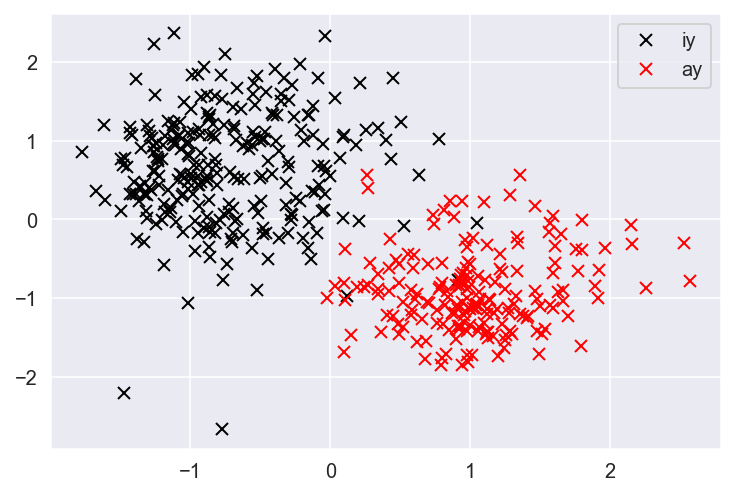

In [4]:
plt.plot(iy[:,0],iy[:,1],'kx')#Plotando todas as linhas da primeira coluna em relação a da segunda de iy
plt.plot(ay[:,0],ay[:,1],'rx')#Plotando todas as linhas da primeira coluna em relação a da segunda de ay
plt.legend(('iy','ay'), loc='upper right')
plt.show()

## __Cálculo dos Parâmetros Probabilísticos__

### $\phi$
$$\phi =\frac{1}{m} \sum_{i=1}^m 1 ({y^{(i)}=1})$$

In [5]:
iguaisa1=len(dados[dados['L']==1]['L'])
print(iguaisa1)#Quantidade de n°s ==1
tamanho_total=len(dados['L'].to_numpy())
print(tamanho_total)#Quantidade total de dados)
phi=iguaisa1/tamanho_total
print(phi)

187
449
0.41648106904231624


### $\mu_0$ (Média 0)


$$\mu_0=\cfrac{\sum_{i=1}^m 1(y^{(i)}=0)x^{(i)}}{\sum_{i=1}^m 1(y^{(i)}=0)}$$

In [6]:
x=dados.to_numpy()[:,:-1]
y=dados['L'].to_numpy()
id=lambda x: 1 if x ==True else 0
sumnum, sumden=np.zeros(2),np.zeros(1)
for i in range(0,len(y)):
    sumnum+=np.dot(id(y[i]==0),x[i,:])
    sumden+=np.dot(1,id(y[i]==0))
mu0=sumnum/sumden
mu0

array([-0.73232376,  0.65386716])

### $\mu_1$ (Média 1)

$$\mu_1=\cfrac{\sum_{i=1}^m 1(y^{(i)}=1)x^{(i)}}{\sum_{i=1}^m 1(y^{(i)}=1)}$$

In [7]:
sumnum1, sumden1=np.zeros(2),np.zeros(1)
for i in range(0,len(y)):
    sumnum1+=np.dot(id(y[i]==1),x[i,:])
    sumden1+=np.dot(1,id(y[i]==1))
mu1=sumnum1/sumden1
mu1

array([ 1.02603649, -0.91611335])

###  $\Sigma$ (Matriz de covariância)

$$\Sigma = \frac{1}{m} \sum_{i=1}^{m}(x^{(i)}-\mu_{y^{(i)}})(x^{(i)}-\mu_{y^{(i)}})^T$$

In [16]:
#mini funcao que determina a selecao da media
escolhe_media=lambda yi:mu0 if yi==0 else mu1

m=len(y)#tamanho total
temp_matrix=np.zeros(2)
list_matrices=[]

for i in range(0,len(y)):
    temp_matrix=x[i,:]-escolhe_media(y[i])
    temp_matrix=temp_matrix.reshape(2,1)
    transposta=temp_matrix.transpose()
    transposta=transposta.reshape(1,2)
    list_matrices.append(np.dot(temp_matrix,transposta))

cov=sum(list_matrices)/m
cov

array([[0.24638193, 0.01812238],
       [0.01812238, 0.3987564 ]])

In [13]:
detcov=np.linalg.det(cov)#Determinante da matriz de cov.
detcov

0.0979179488868977

### Distribuição Gaussiana


$$\mathcal{N(\mu)}=\frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)}$$

In [14]:
def distribuicao(x,mu):
    k=(1/((2*np.pi)**(2/2))*np.sqrt(detcov))
    e=np.exp(-.5*(np.dot((x-mu).T,(np.linalg.inv(cov)))).dot((x-mu)))
    return k*e

Definindo duas distribuições(uma centrada em $\mu_0$ e outra em $\mu_1$) no plano de representação:

In [15]:
def vetorizacao(x,y):
    vectors=[]
    for i in range(len(x)):
        for j in range(len(y)):
            l=[]
            l=np.array([x[i],y[j]])
            vectors.append(l)
    return vectors

#Definindo Malha espacial XY do plano para cálculo
#de curvas de contorno

x1=np.linspace(-2,3,100)
y1=np.linspace(-3,3,100)
vectors=vetorizacao(x1,y1)
zs1,zs2=[],[]

for vec in vectors:
    zs1.append(distribuicao(vec,mu0))
    zs2.append(distribuicao(vec,mu1))
zs1=np.array(zs1).reshape(100,100);zs2=np.array(zs2).reshape(100,100)


Temos a seguinte representação Tridimensional:

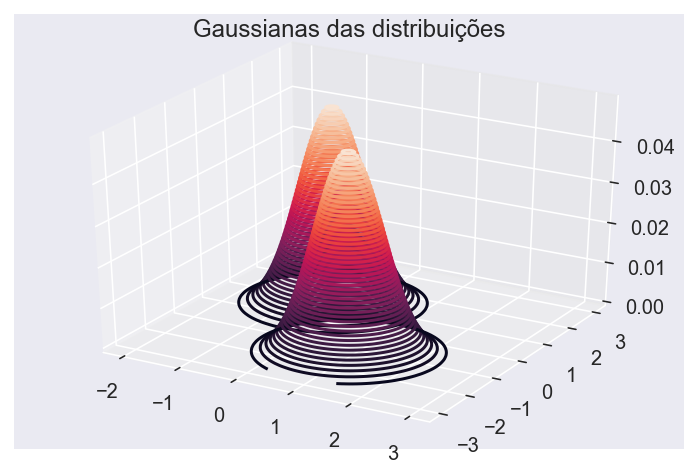

In [80]:
ax=plt.axes(projection='3d')
ax.contour3D(x1,y1,zs1,50)
ax.contour3D(x1,y1,zs2,50)
ax.set_title('Gaussianas das distribuições')
plt.show()

## __Probabilidade dos pontos em cada Distribuição__

De acordo com Bayes:

$$(1) : p(y|x)=\frac{p(x|y)p(y)}{p(x)}$$ 

Onde as probabilidades a priori são dadas por:

$$(2.1):  p(x|y=0) \sim \mathcal{N(\mu_0)}$$

$$(2.2): p(x|y=1) \sim \mathcal{N(\mu_1)}$$ 

Se substituirmos (2.1) em (1) e (2.2) em (1), ficaremos com:

$$(1.1): \frac{p(x|y=0)p(0)}{p(x)}$$

$$(1.2): \frac{p(x|y=1)p(1)}{p(x)}$$


Comparando as eqs. (1.1) e (1.2), temos que se (1.1)>(1.2) o ponto terá mais chance
de pertencer a classe "iy"(média 0),o que nos permite classificar:
$$p(y)=0$$
E se (1.2) >(1.1), o ponto terá mais chance de pertencer a classe "ay"(média 1), o que
gera:
$$p(y)=1$$

Já se ambas representações de probabilidades forem iguais, teremos:
$$(1.3): p(x|y=0)p(0)=p(x|y=1)p(1)$$
Neste caso estamos considerando um lugar geométrico no plano onde ambas probabilidades são iguais. 


In [0]:
xdados=dados.to_numpy()[:,:-1]
ydados=dados.to_numpy()[:,-1]
prob_dist_1=[];prob_dist_2=[];probs=[]

#Preenchendo lista de probabilidades de cada ponto
for index in range(len(xdados)):
    probs.append(distribuicao(xdados[index],escolhe_media(ydados[index])))
    prob_dist_1.append(distribuicao(xdados[index],mu0))
    prob_dist_2.append(distribuicao(xdados[index],mu1))
novos_dados=dados.copy()

novos_dados['PD1(u0)-iy']=prob_dist_1
novos_dados['PD2(u1)-ay']=prob_dist_2


py=lambda y:phi**(y)*((1-phi)**(1-y)) #Função de Bernoulli

classificacao=[0 if py(0)*prob_dist_1[i] > py(1)*prob_dist_2[i] else 1 for i in range(len(prob_dist_1))] #Bayes

#Salvando a probabilidade dos pontos em um arquivo de excel
novos_dados['Predicao']=classificacao
novos_dados.to_excel('probs-pontos.xlsx') # Salvando dados de classificacao

Entã a nova representação gráfica dos pontos com o critério de classsificação fica:

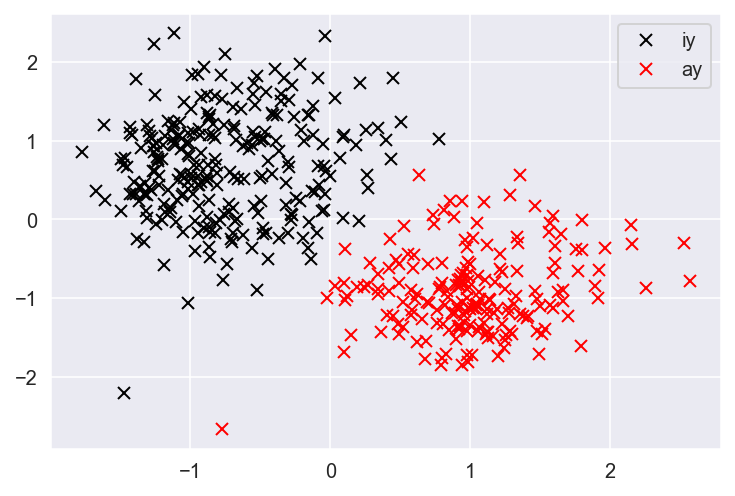

In [83]:
pred1iy=novos_dados[novos_dados['Predicao']==0][['D_1','D_2']].to_numpy() 
pred2ia=novos_dados[novos_dados['Predicao']==1][['D_1','D_2']].to_numpy() 

plt.plot(pred1iy[:,0],pred1iy[:,1],'kx')
plt.plot(pred2ia[:,0],pred2ia[:,1],'rx')
plt.legend(('iy','ay','limite de decisão'), loc='upper right')

plt.show()

É possível contrastar a diferença entre ambas representações em sua totalidade em um arquivo de excel chamado "prob-pontos.xlsx", como exemplo entre a 25° e 45° posição ficam como:

In [88]:
novos_dados[25:45]

,D_1,D_2,L,PD1(u0)-iy,PD2(u1)-ay,Predicao
25,-0.594403,0.966505,0,0.042706,1.561315e-06,0
26,-1.201193,0.764554,0,0.031044,2.926919e-08,0
27,-0.867796,1.071024,0,0.038141,1.163061e-07,0
28,0.201585,-0.021650,0,0.004226,3.978821e-03,0
29,-0.900357,-0.114058,0,0.022932,8.708525e-06,0
30,-0.964447,-0.398730,0,0.011584,9.217107e-06,0
31,-0.157015,-0.366340,0,0.006147,1.746428e-03,0
32,-1.266877,0.614309,0,0.027887,3.063961e-08,0
33,-0.881479,1.357182,0,0.025054,2.029612e-08,0
34,-1.009193,0.966642,0,0.037072,6.159248e-08,0


Como a malha de representação é limitada, não há exatamente um ponto onde a diferença de ambas
porbabilidades(distâncias) é aproximadamente zero, em outras palavras, a igualdade em (1.3)
não é exata.
Então na resolução, adotei a menor probabilidadde resultante do set de treinamento e armazenei em 
uma variável(minima), dividindo-a por um valor consideravelmente alto para que fosse tão
próximo de zero quanto possível.
Desta forma varri a malha do plano XY e salvei os valores onde aconteciam essas probabilidades mínimas
com o critério considerado. O resultante foram 5 pontos em um total de 10000.

5


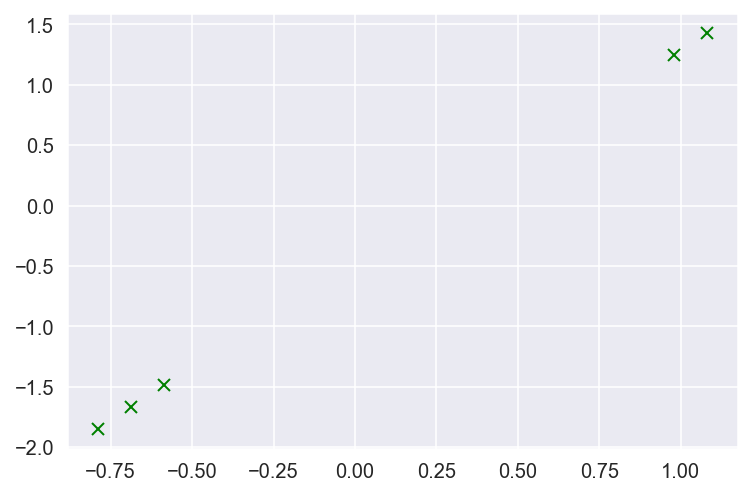

In [70]:
#Definindo qual o valor mínimo
distancias=[]

for i in range(len(prob_dist_1)):
    endereco,distancia=i,(py(0)*prob_dist_1[i] - py(1)*prob_dist_2[i])
    distancias.append((endereco, abs(distancia)))

minima=min(distancias[1])

linha=[]

for vec in vectors:#Esse loop seleciona pontos para aplicação de uma regressão linear
    if abs(py(0)*distribuicao(vec,mu0)-py(1)*distribuicao(vec,mu1))<(minima)/10000:#Probabilidades aproximadamente iguais
        if vec[0]<1.1 and vec[0]>-0.8:
            if vec[1]>-2.5 and vec[1]<2.5: #Filtrando intervalo, pois acontece erro de máquina para extremos 
                linha.append(vec)

print(len(linha))
r=np.array(linha)
plt.plot(r[:,0],r[:,1],'gx')
plt.show()

### Aplicando a Regressão Linear

A partir dos pontos representados, podemos traçar uma aproximação através de uma regressão linear.
Como o enfoque do algoritmo de regressão linear já foi apresentado em outro trabalho, utilizei um módulo pronto
para isso, salvando os valores no intervalo geral de representação "limite".

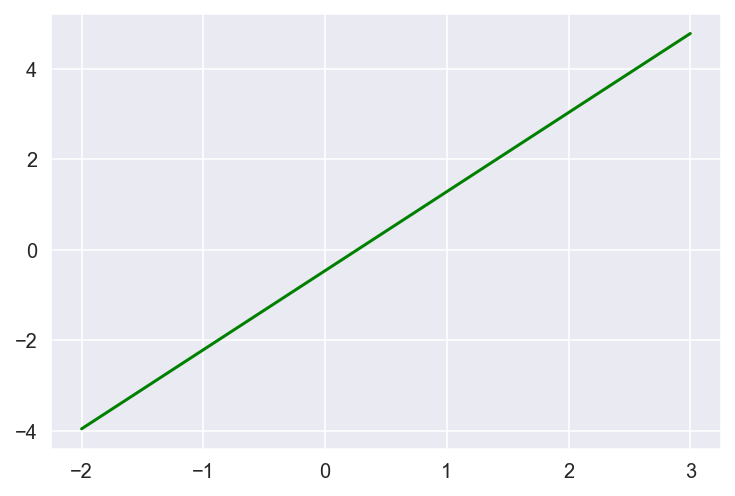

In [76]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(r[:,0][:,np.newaxis],r[:,1])

limite=model.predict(x1.reshape(-1,1))

plt.plot(x1,limite,'g')

## __Gráficos de Contorno e Limite de Decisão__

A partir dos dados obtidos, podemos entender o comportamento geral do algoritmo com a representação das curvas de nível das distribuições normais, juntamente com o limite de decisão que permite visualizar como ocorre a classificação.

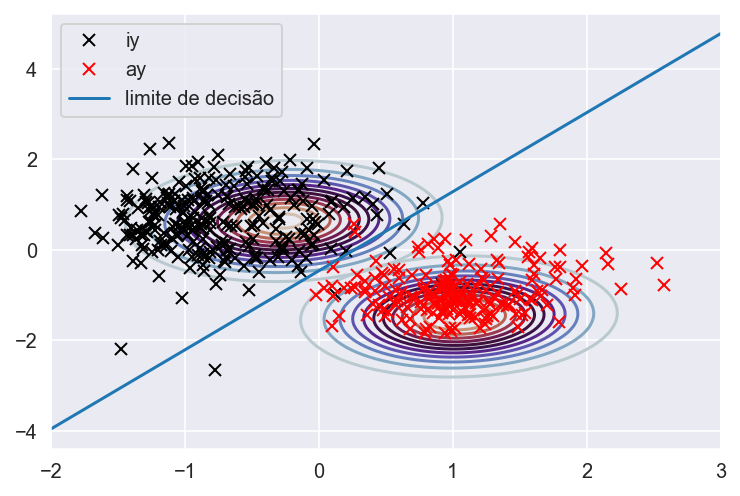

In [78]:
plt.plot(iy[:,0],iy[:,1],'kx')
plt.plot(ay[:,0],ay[:,1],'rx')
plt.plot(x1,limite)
plt.legend(('iy','ay','limite de decisão'))
plt.contour(x1,y1,zs1,12, cmap='twilight')
plt.contour(x1,y1,zs2,12, cmap='twilight')
plt.show()